# Loading data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import re
import math

In [2]:
%matplotlib inline

In [4]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [8]:
df = pd.read_csv("cleaned_housing_data_all.csv")

In [9]:
df.head(3)

,Unnamed: 0,name,neighbourhood_cleansed,city,zipcode,latitude,longitude,is_location_exact,property_type,room_type,...,bedrooms,beds,square_feet,review_scores_value,day_price,week_price,month_price,price_sqft,borough,district
0,0,Stay like a real New Yorker!,Midtown East,New York,10022,40.756852,-73.964754,t,Apartment,Entire home/apt,...,1.0,1.0,NaN,9.0,160.0,1000.0,4800.0,NaN,Manhattan,Gramercy Park and Murray Hill
1,1,Option of 2 Beds w Private Bathroom,Bushwick,Brooklyn,11221,40.692189,-73.924120,t,Apartment,Private room,...,1.0,2.0,NaN,10.0,58.0,406.0,1740.0,NaN,Brooklyn,Bushwick and Williamsburg
2,2,Charming Bright West Village Studio,West Village,New York,10011,40.734751,-74.002592,t,Apartment,Entire home/apt,...,1.0,1.0,NaN,9.0,185.0,1295.0,3400.0,NaN,Manhattan,Chelsea and Clinton


# Plot distributions

## Housing

Let us plot the distribution of Airbnb's renting prices, surface of appartments.

As some quantities have high outliers, we decide to plot the distributions with and without the outliers for a better visibility.

In [10]:
class Boxplot(object):
    
    def __init__(self, data, yvar, ylab, loc):
        self.data = data
        self.yvar = yvar
        self.ylab = ylab
        self.loc = loc 
        # location can be Manhattan, Brooklyn, Queens, New York if all neighborhood are selected

    

    def plotboxplot(self):
        fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (13,8))
        fig.subplots_adjust(wspace= 0.5)
        
        
        
        # remove missing values related to the variable
        non_missing = [ind for ind in range(len(self.data.index)) if pd.isnull(self.data[self.yvar])[ind] == False] 
        new_data = self.data.ix[non_missing,]
        
        # if we select a particular borough, get the corresponding subset of data
        if self.loc != None :
            new_data = new_data[self.data.borough == self.loc]
        
        # reset indices of data frame
        new_data = new_data.reset_index()


        
        # rectangular box plot
        bplot1 = axes[0].boxplot(new_data[self.yvar], 0, 'bD', patch_artist = True)
        # notch shape box plot (notch = 1)
        bplot2 = axes[1].boxplot(new_data[self.yvar], 1, '',  patch_artist = True)
        
        # adding horizontal grid lines
        axes[0].set_xlabel('With outliers', fontsize = 14)
        axes[1].set_xlabel('Without outliers', fontsize = 14)
        for ax in axes:
            ax.set_ylabel(self.ylab, fontsize = 14)

        # add x-tick labels
        plt.setp(axes, xticks=[1], xticklabels=[self.ylab])
        
        if self.loc != None :
            plt.suptitle('Distribution of ' + self.ylab + ' in ' + self.loc + ' , January 2015 \n Airbnb data \n', fontsize = 16)
        else :
            plt.suptitle('Distribution of ' + self.ylab + ' in New York City , January 2015 \n Airbnb data \n', fontsize = 16)

### Get distribution of prices for each borough

In [11]:
bx_price_bronx = Boxplot(data = df, yvar = 'day_price', ylab = 'daily prices ($)', loc = 'Bronx')
bx_price_brookl = Boxplot(data = df, yvar = 'day_price', ylab = 'daily prices ($)', loc = 'Brooklyn')
bx_price_manh = Boxplot(data = df, yvar = 'day_price', ylab = 'daily prices ($)', loc = 'Manhattan')
bx_price_queens = Boxplot(data = df, yvar = 'day_price', ylab = 'daily prices ($)', loc = 'Queens')
bx_price_staten = Boxplot(data = df, yvar = 'day_price', ylab = 'daily prices ($)', loc = 'Staten Island')
bx_price_ny = Boxplot(data = df, yvar = 'day_price', ylab = 'daily prices ($)', loc = None)

Here is the distribution of prices in Manhattan. On the left, all observations are plotted. It is difficult to analyze the boxplot because of the outliers (cf. graph on the left). On the right-chart, we print the boxplot without the outliers to get the common trend.

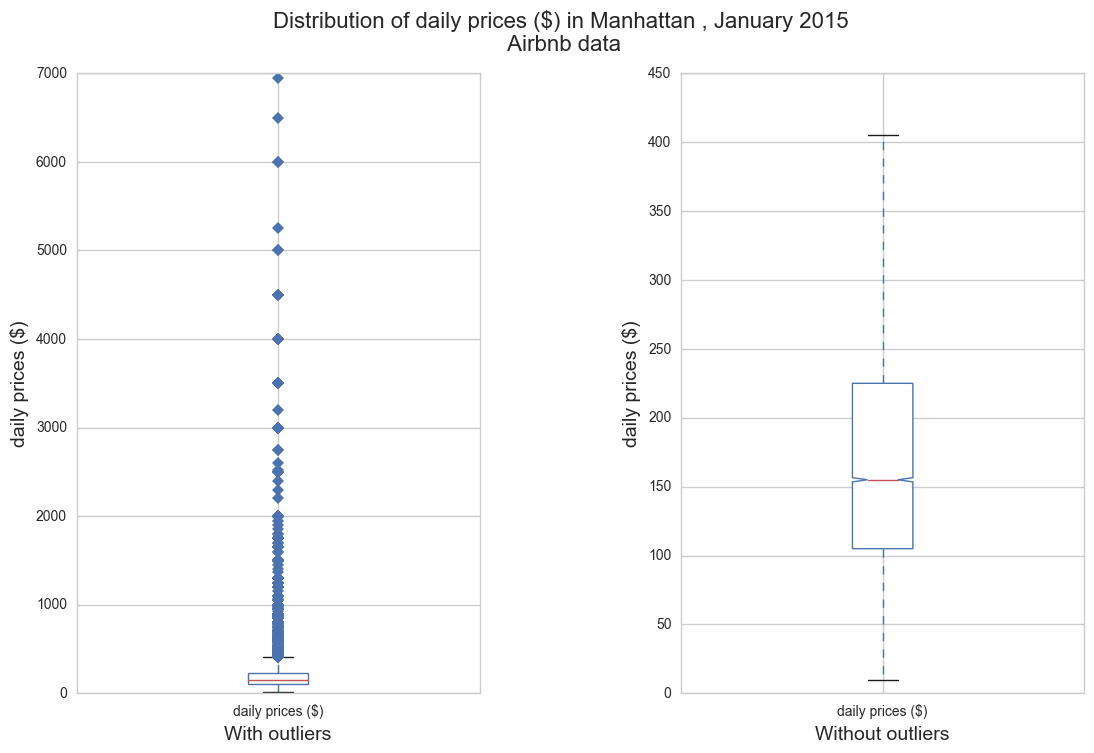

In [12]:
#bx_price_bronx.plotboxplot()
#bx_price_brookl.plotboxplot()
bx_price_manh.plotboxplot()
#bx_price_queens.plotboxplot()
#bx_price_staten.plotboxplot()
#bx_price_ny.plotboxplot()

## Distribution with another dimension

In [13]:
class BoxPlotPerDimens(object):
    
    def __init__(self, var, dim, xlab, ylab, data, loc):
        self.var = var
        self.dim = dim
        self.xlab = xlab
        self.ylab = ylab
        self.data = data
        self.loc = loc
        
        
    def create_list(self):
        
        # if we select a particular borough, get the corresponding subset of data
        if self.loc != None :
            new_data = self.data[self.data.borough == self.loc]
            # reset indices of data frame
            new_data = new_data.reset_index()
        
        else :
            new_data = self.data
           
        # unique values in the list. 
        # Ex. if dimension is borough, the unique observations are Bronx, Brooklyn, Manhattan, Queens, Staten Island
        dim_list = list(np.unique(np.array(new_data[self.dim])))
        
        
        # for each of these values (ex. each borough), get the list of prices or surfaces
        all_data = []
        for i in range(len(dim_list)):
            row_ind = [ind for ind in range(len(new_data)) if new_data[self.dim][ind] ==  dim_list[i]]
            all_data.append(new_data[self.var][row_ind])
        return(all_data, dim_list)
    
    
    
    
    def plotboxplot(self):
        all_data = self.create_list()[0]
        dim_names = self.create_list()[1]
        list_col = [ "lightcoral", "lightgreen", "lightblue", "green", "yellow", "purple", "orange", "dodgerblue", "pink", "chartreuse", "fuchsia"]
        
        
        fig, axes = plt.subplots(figsize=(20, 12))
        bplot = plt.boxplot(all_data, 0, '', # to remove outliers
                                vert=True,   # vertical box aligmnent
                                patch_artist=True)   # fill with color
        # to display outliers : write instead : 'bD' (blue dots) or 'rD' (red dots) etc.


        # fill with colors
        colors = list_col[:len(all_data)]
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)


        # adding horizontal grid lines
        #for ax in axes:
            #ax.yaxis.grid(True)
            #ax.set_xticks([y+1 for y in range(len(all_data))], )
        axes.set_xlabel(self.xlab, fontsize = 14)
        axes.set_ylabel(self.ylab, fontsize = 14)


        # add x-tick labels
        plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
                 xticklabels = dim_names)
        
        plt.yticks(fontsize = 13)
        plt.xticks(rotation=40, fontsize = 13) 

        # main title
        if self.loc != None :
            plt.suptitle('Distribution of ' + self.ylab + ' in ' + self.loc + ' \n \n January 2015, Airbnb data \n', fontsize = 20)
        else :
            plt.suptitle('Distribution of ' + self.ylab + ' in New York City \n \n January 2015, Airbnb data \n', fontsize = 20)

### Price

In [14]:
brook_price = BoxPlotPerDimens(var = 'day_price', dim = 'district', xlab = 'neighborhood', ylab = 'price per day ($)', data = df, loc = 'Brooklyn')
manh_price = BoxPlotPerDimens(var = 'day_price', dim = 'district', xlab = 'neighborhood', ylab = 'price per day ($)', data = df, loc = 'Manhattan')
bronx_price = BoxPlotPerDimens(var = 'day_price', dim = 'district', xlab = 'neighborhood', ylab = 'price per day ($)', data = df, loc = 'Bronx')
queens_price = BoxPlotPerDimens(var = 'day_price', dim = 'district', xlab = 'neighborhood', ylab = 'price per day ($)', data = df, loc = 'Queens')
staten_price = BoxPlotPerDimens(var = 'day_price', dim = 'district', xlab = 'neighborhood', ylab = 'price per day ($)', data = df, loc = 'Staten Island')

nyc_price = BoxPlotPerDimens(var = 'day_price', dim = 'borough', xlab = 'borough', ylab = 'price per day ($)', data = df, loc = None)

Here is a comparison of daily renting prices among neighborhoods. We can select a particular borough such as Manhattan or Queens for example. 

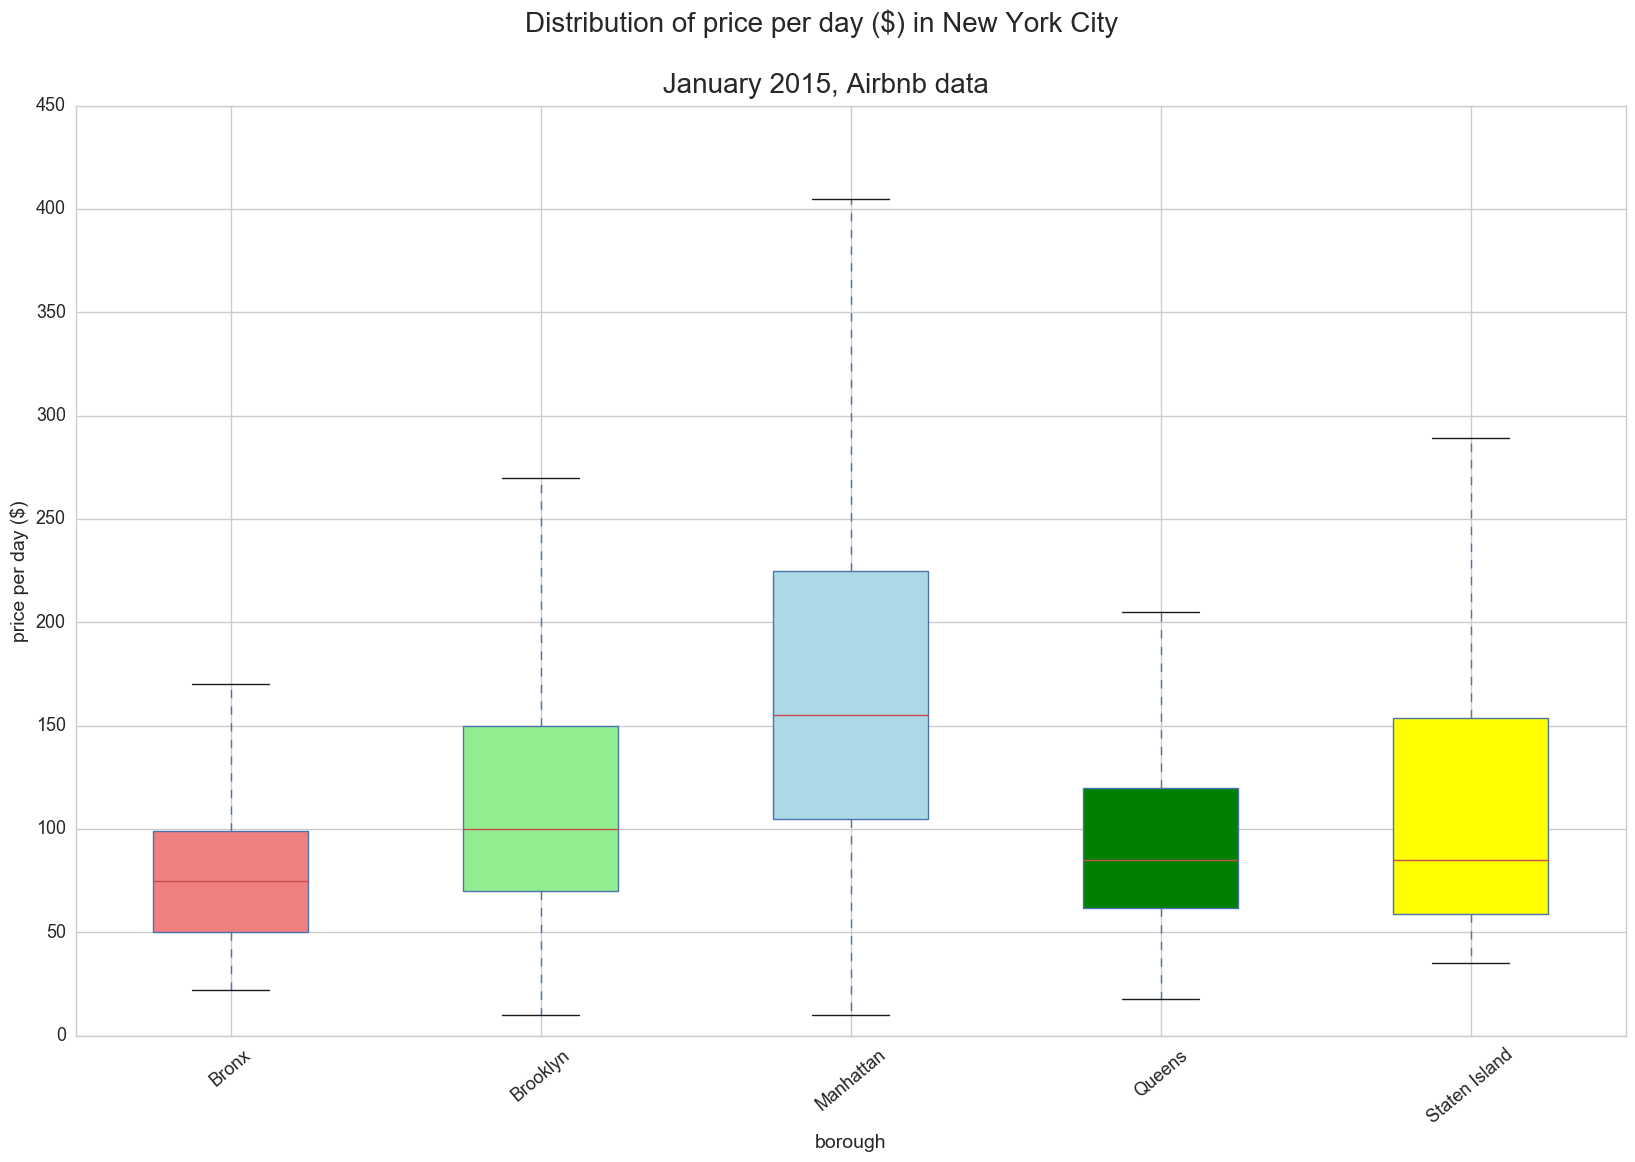

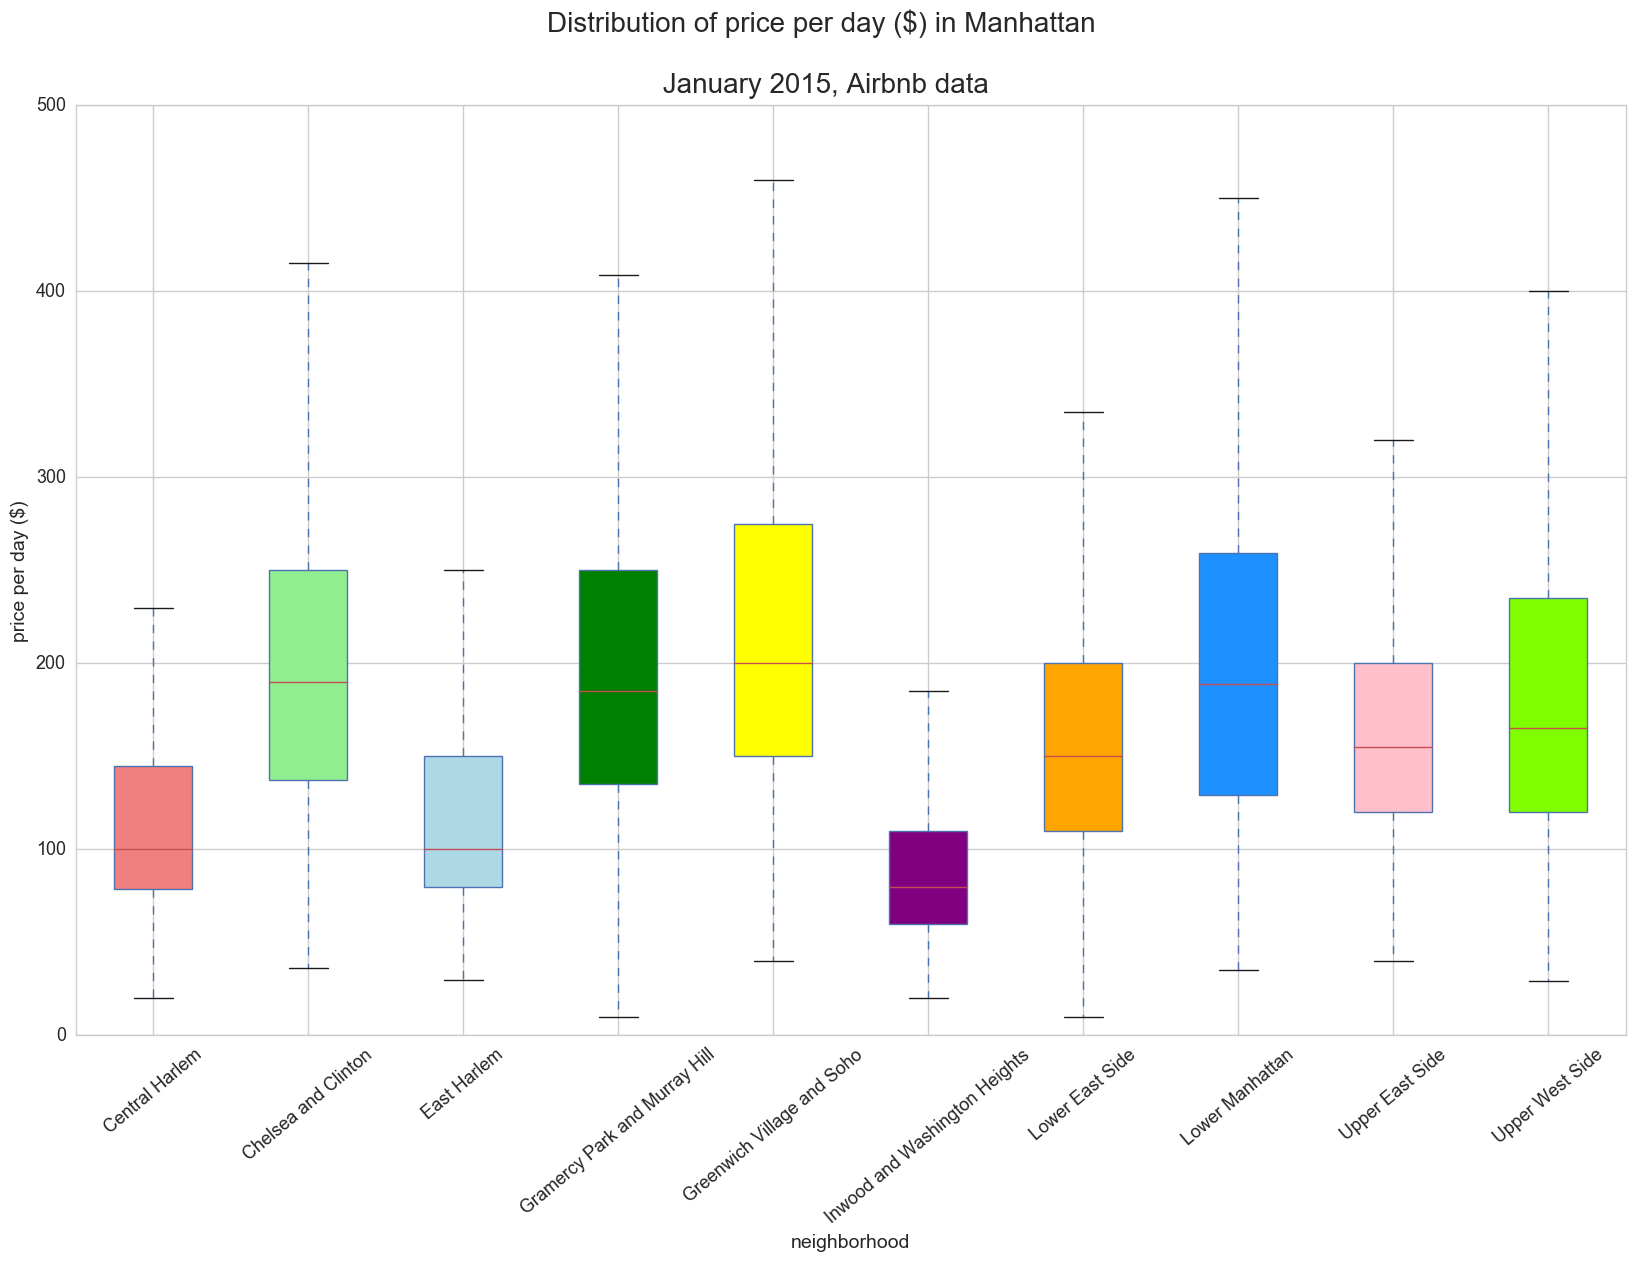

In [15]:
nyc_price.plotboxplot()
#staten_price.plotboxplot()
#queens_price.plotboxplot()
#bronx_price.plotboxplot()
manh_price.plotboxplot()
#brook_price.plotboxplot()

# Plot Frequencies

## Frequencies by another dimension (neighborhood, borough)

In [16]:
class CountPerDimens(object):
    
    def __init__(self, var, dim, xlab, ylab, col, data, loc):
        self.var = var
        self.dim = dim
        self.xlab = xlab
        self.ylab = ylab
        self.col = col
        self.data = data
        self.loc = loc
        
    def plotcount(self):
        if self.loc != None :
            new_data = self.data[self.data.borough == self.loc]
        else :
            new_data = self.data
            
        fig, axes = plt.subplots(figsize = (18, 13))
        sns.countplot(x = self.var, hue = self.dim, data = new_data, palette = self.col)
        
        plt.yticks(fontsize = 13)
        plt.xticks(rotation=40, fontsize = 13) 
        axes.set_ylabel(self.xlab, fontsize = 14)
        axes.set_xlabel(self.ylab, fontsize = 14)

        # main title
        if self.loc != None :
            plt.suptitle(self.xlab + ' per ' + self.ylab + ' in ' + self.loc + ' \n \n January 2015, Airbnb data \n', fontsize = 20)
        else :
            plt.suptitle(self.xlab + ' per ' + self.ylab + ' in New York City \n \n January 2015, Airbnb data \n', fontsize = 20)


### Create the graphs

In [17]:
cnt_neigh_Brook = CountPerDimens(var = 'district', dim = None, xlab = 'Number of appartments', 
                           ylab = 'neighborhood', col = 'Reds_d', data = df, loc = 'Brooklyn')
cnt_neigh_roomtype_Brook = CountPerDimens(var = 'district', dim = 'room_type', xlab = 'Number of appartments for each room type', 
                     ylab = 'neighborhood', col = 'Blues_d', data = df, loc = 'Brooklyn')
cnt_property_Brook = CountPerDimens(var = 'property_type', dim = None, xlab = 'Number of appartments', 
                     ylab = 'property type', col = 'Greens_d', data = df, loc = 'Brooklyn')


In [18]:
cnt_neigh_Bronx = CountPerDimens(var = 'district', dim = None, xlab = 'Number of appartments', 
                           ylab = 'neighborhood', col = 'Reds_d', data = df, loc = 'Bronx')
cnt_neigh_roomtype_Bronx = CountPerDimens(var = 'district', dim = 'room_type', xlab = 'Number of appartments for each room type', 
                     ylab = 'neighborhood', col = 'Blues_d', data = df, loc = 'Bronx')
cnt_property_Bronx = CountPerDimens(var = 'property_type', dim = None, xlab = 'Number of appartments', 
                     ylab = 'property type', col = 'Greens_d', data = df, loc = 'Bronx')

In [19]:
cnt_neigh_Staten = CountPerDimens(var = 'district', dim = None, xlab = 'Number of appartments', 
                           ylab = 'neighborhood', col = 'Reds_d', data = df, loc = 'Staten Island')
cnt_neigh_roomtype_Staten = CountPerDimens(var = 'district', dim = 'room_type', xlab = 'Number of appartments for each room type', 
                     ylab = 'neighborhood', col = 'Blues_d', data = df, loc = 'Staten Island')
cnt_property_Staten = CountPerDimens(var = 'property_type', dim = None, xlab = 'Number of appartments', 
                     ylab = 'property type', col = 'Greens_d', data = df, loc = 'Staten Island')

In [20]:
cnt_neigh_Manh = CountPerDimens(var = 'district', dim = None, xlab = 'Number of appartments', 
                           ylab = 'neighborhood', col = 'Reds_d', data = df, loc = 'Manhattan')
cnt_neigh_roomtype_Manh = CountPerDimens(var = 'district', dim = 'room_type', xlab = 'Number of appartments for each room type', 
                     ylab = 'neighborhood', col = 'Blues_d', data = df, loc = 'Manhattan')
cnt_property_Manh = CountPerDimens(var = 'property_type', dim = None, xlab = 'Number of appartments', 
                     ylab = 'property type', col = 'Greens_d', data = df, loc = 'Manhattan')

In [21]:
cnt_neigh_Queens = CountPerDimens(var = 'district', dim = None, xlab = 'Number of appartments', 
                           ylab = 'neighborhood', col = 'Reds_d', data = df, loc = 'Queens')
cnt_neigh_roomtype_Queens = CountPerDimens(var = 'district', dim = 'room_type', xlab = 'Number of appartments for each room type', 
                     ylab = 'neighborhood', col = 'Blues_d', data = df, loc = 'Queens')
cnt_property_Queens = CountPerDimens(var = 'property_type', dim = None, xlab = 'Number of appartments', 
                     ylab = 'property type', col = 'Greens_d', data = df, loc = 'Queens')

In [22]:
cnt_neigh_NYC = CountPerDimens(var = 'borough', dim = None, xlab = 'Number of appartments', 
                           ylab = 'borough', col = 'Reds_d', data = df, loc = None)
cnt_neigh_roomtype_NYC = CountPerDimens(var = 'borough', dim = 'room_type', xlab = 'Number of appartments for each room type', 
                     ylab = 'borough', col = 'Blues_d', data = df, loc = None)
cnt_property_NYC = CountPerDimens(var = 'property_type', dim = None, xlab = 'Number of appartments', 
                     ylab = 'property type', col = 'Greens_d', data = df, loc = None)

- The following graph displays the volume of available appartments in a particular borough of NYC per neighborhood. 
- The 2nd graph displays the type and volume of each rental (the whole appartment can be rented, or only a private room or a shared room). 
- The 3rd one shows the different types of property. It can be an appartment, a house, a castle, etc.

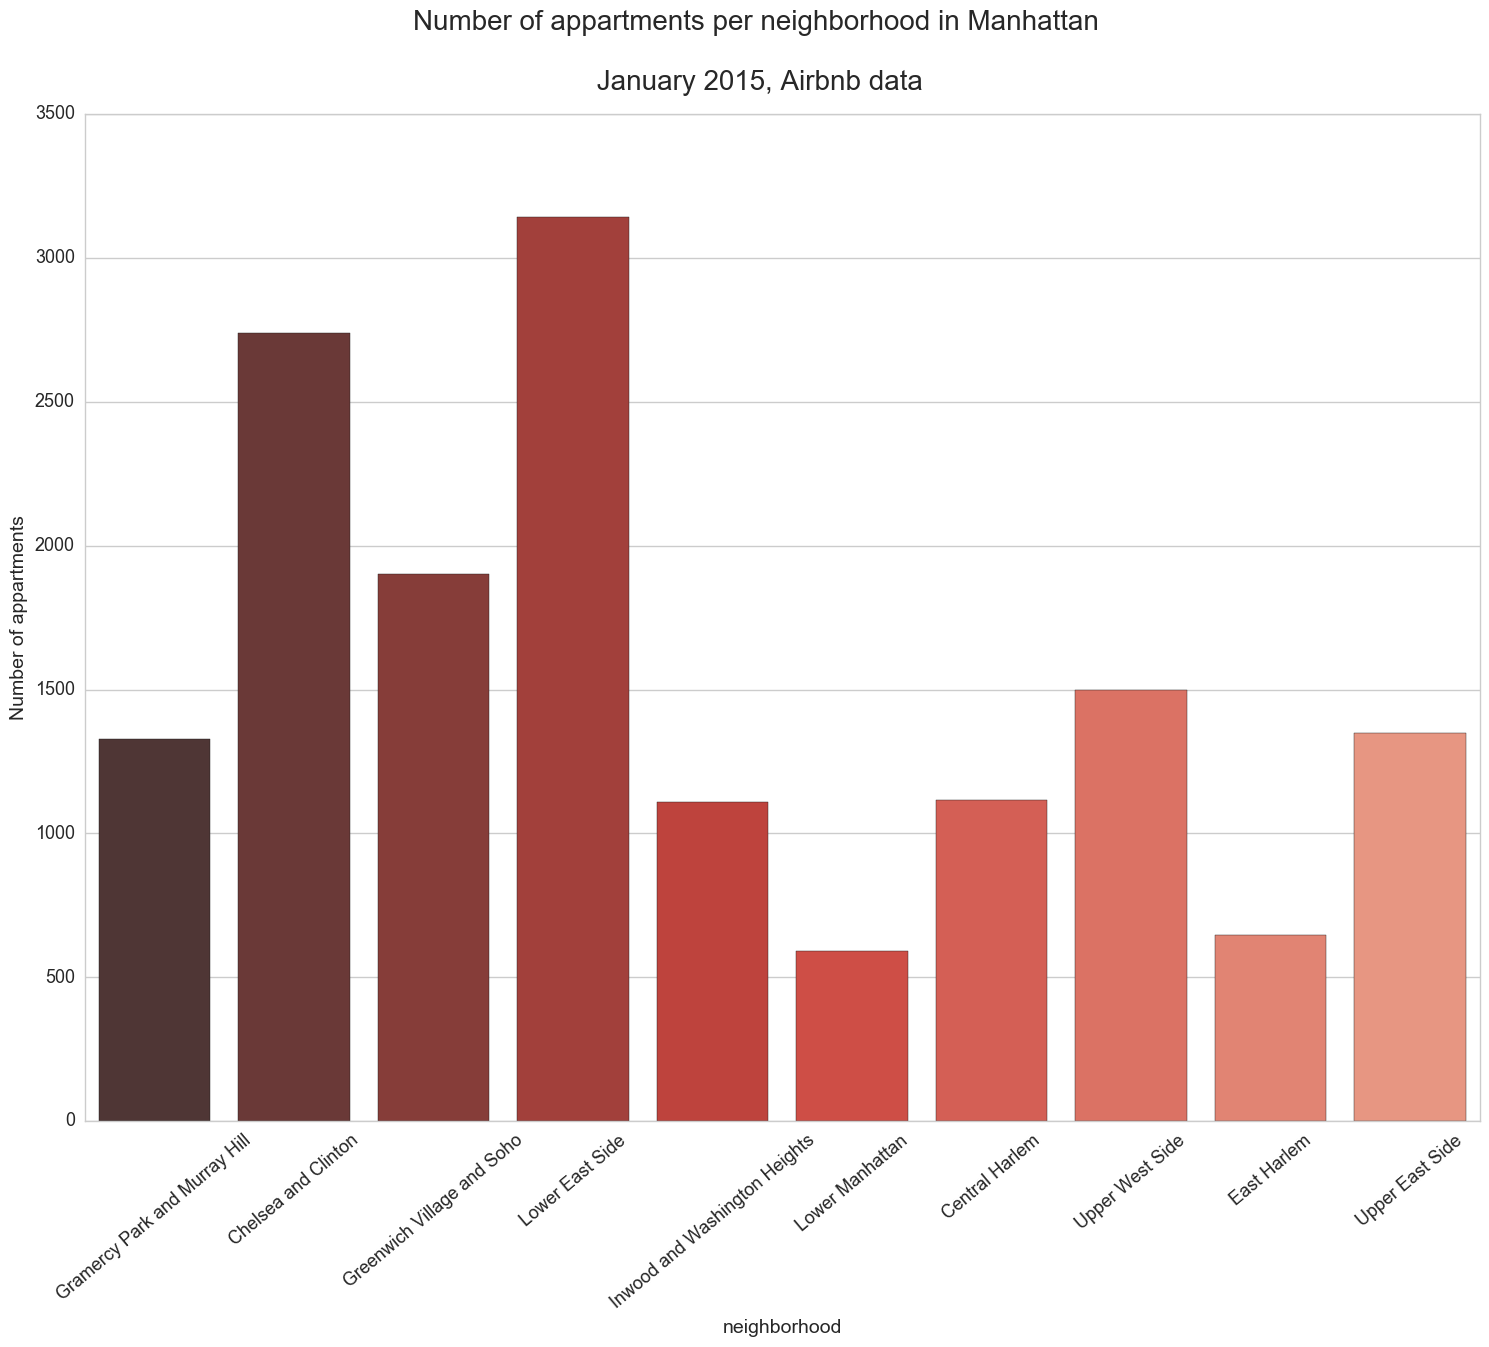

In [23]:
cnt_neigh_Manh.plotcount()

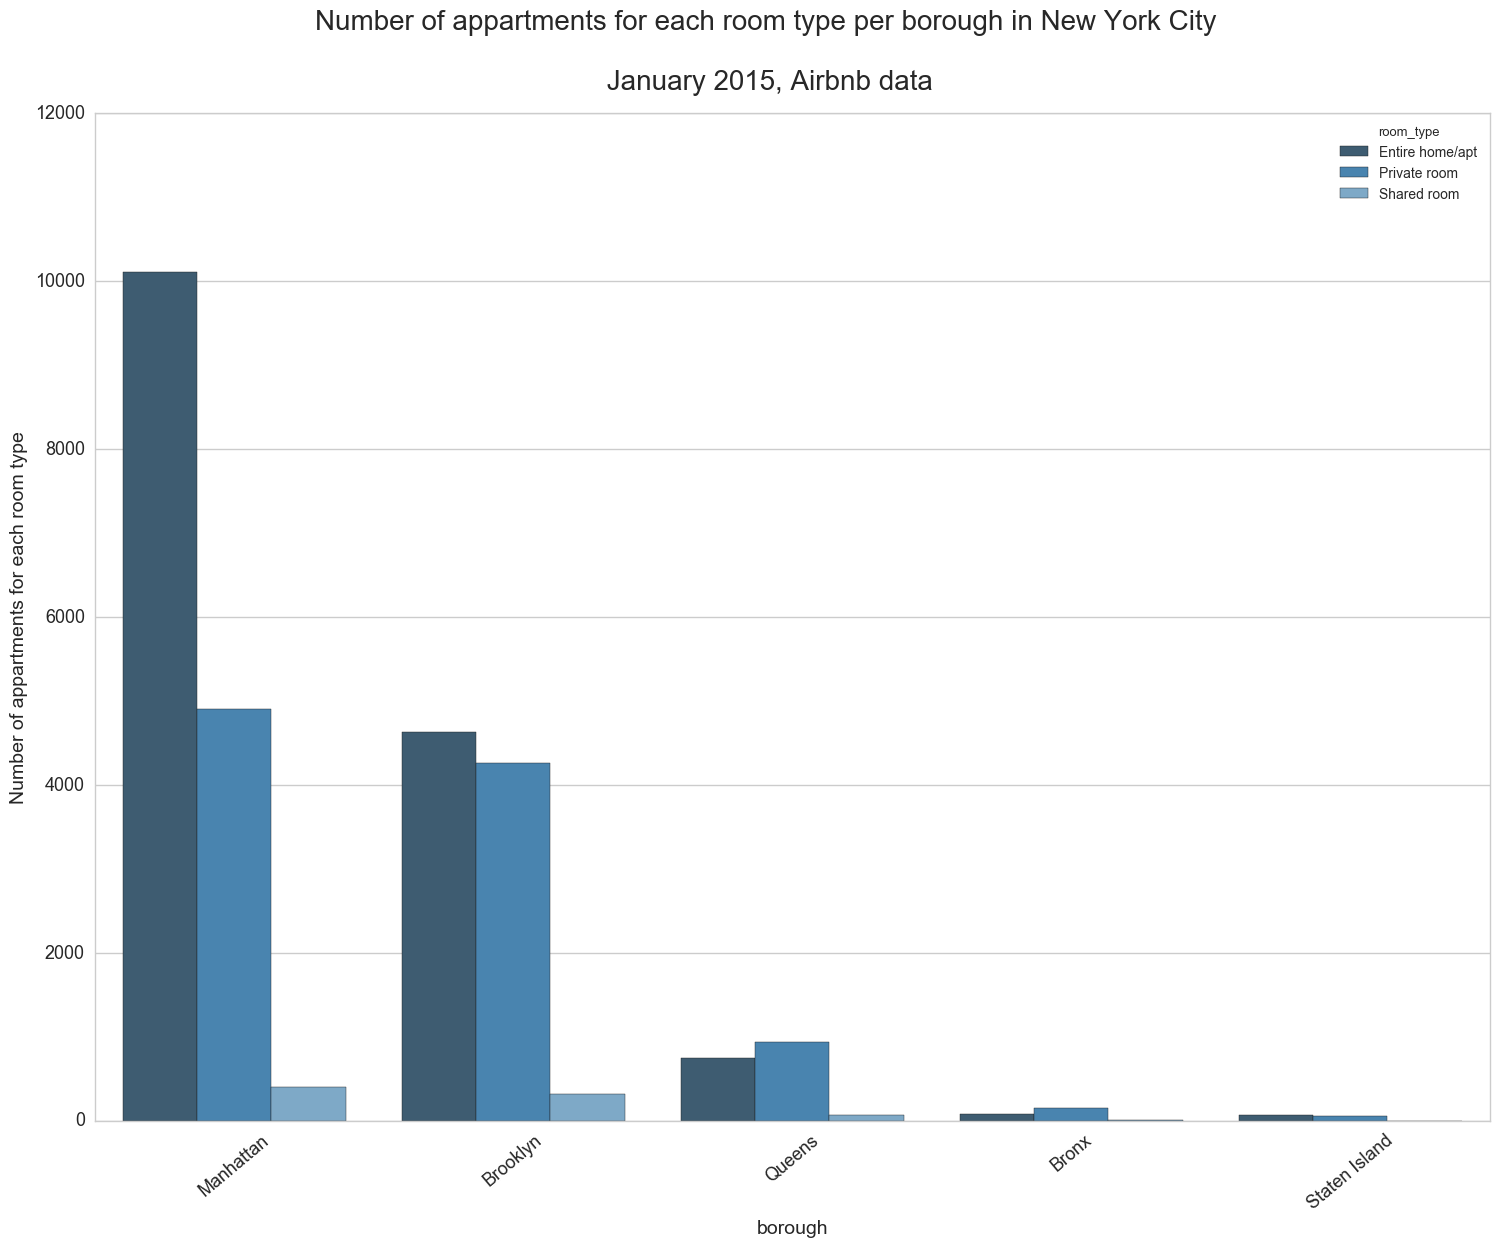

In [24]:
cnt_neigh_roomtype_NYC.plotcount()

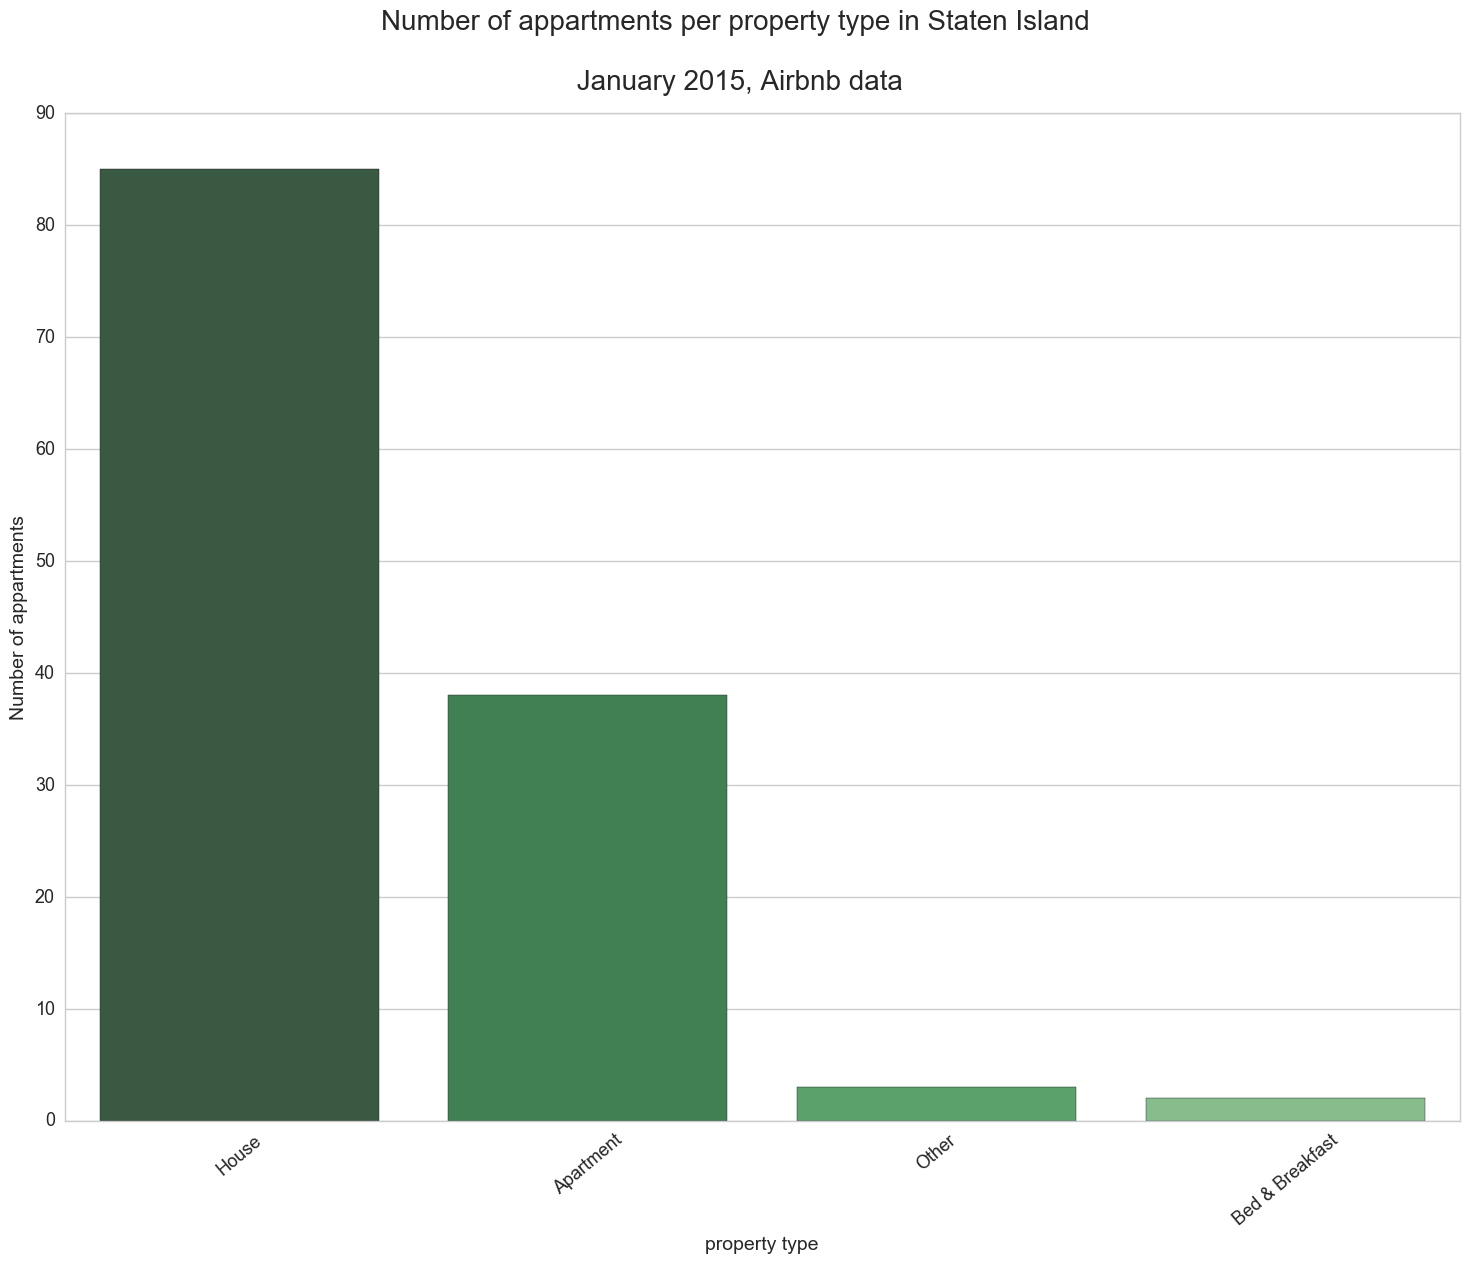

In [25]:
cnt_property_Staten.plotcount()

## Map of Manhattan

Using the Bokeh library, we can create a maping of the prices in Manhattan. Each neighborhood is associated with a color which represents a certain price.

We split the prices into quintiles to get 5 categories : 
- category 1 (less than \$99/day)
- category 2 (between \$100/day and \$140/day)
- category 3 (between \$141/day and \$180/day)
- category 4 (between \$181/day and \$249/day)
- category 5 (above \$250/day)


Each of these categories is associated with a color. 

We compute the average price in each neighborhood and link it to the corresponding category and therefore color.

In [26]:
colors = ['#FFD700', '#DAA520', '#FF8C00', '#DC143C','#800000']

In [27]:
df0 = df[df.borough == "Manhattan"]
df0 = df0.reset_index()

In [28]:
# create quintiles to partition prices (5 parts)
np_price = np.array(df0.day_price)

quintile = []
for i in range(4):
    quintile.append(np.percentile(np_price, (i+1)*20))
    
quintile

[99.0, 140.0, 180.0, 250.0]

In [29]:
# associate a color to neighborhoods
mean_price_per_dist = df0.groupby('district').day_price.mean()

dict_district_price = {}
for i in range(len(mean_price_per_dist)):
    district = np.unique(np.array(df0.district))[i]
    dict_district_price[district] = mean_price_per_dist[i]

In [30]:
district_col = []
for i in range(len(dict_district_price.keys())):
    if list(dict_district_price.values())[i] < quintile[0]:
        district_col.append(colors[0])
    elif quintile[0] <= list(dict_district_price.values())[i] < quintile[1]:
        district_col.append(colors[1])
    elif quintile[1] <= list(dict_district_price.values())[i] < quintile[2]:
        district_col.append(colors[2])
    elif quintile[2] <= list(dict_district_price.values())[i] < quintile[3]:
        district_col.append(colors[3])
    else :
        district_col.append(colors[4])

### Prepare data before using Bokeh

In [31]:
import bokeh.sampledata
from collections import OrderedDict
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.sampledata import us_counties, unemployment
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool
from bokeh.plotting import figure, output_file, show

In [32]:
df0.columns.values

array(['index', 'Unnamed: 0', 'name', 'neighbourhood_cleansed', 'city',
       'zipcode', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'square_feet', 'review_scores_value',
       'day_price', 'week_price', 'month_price', 'price_sqft', 'borough',
       'district'], dtype=object)

In [33]:
# convert X, Y into floats (like in the example) : here they are numpy.float64
X, Y = [], []
for i in range(len(df0)):
    X.append(float(df0.longitude[i]))           
    Y.append(float(df0.latitude[i]))

In the example, the inputs are two dictionaries of counties associated with either the latitude or longitude. Here we create a dictionary of neighborhoods associated with a list of coodinates

In [34]:
## Create a dictionary of neighborhoods associated with a list of X coordinates
## Same for Y coordinates

districtX = {}
districtY = {}

for key in dict_district_price.keys():

    locX = []
    locY = []
    for ind in range(len(df0)):
        if df0.district[ind] == key :
            locX.append(X[ind])
            locY.append(Y[ind])
    
    districtX[key] = locX
    districtY[key] = locY

In [35]:
neigh_xs = [districtX[code] for code in districtX]
neigh_ys = [districtY[code] for code in districtY]

In [36]:
source = ColumnDataSource(
    data = dict(
        x=neigh_xs,
        y=neigh_ys,
        color=district_col,
        name=list(dict_district_price.keys()),
        price=list(dict_district_price.values()),
    )
)

### Plot map

In [37]:
output_notebook()

Loading BokehJS ...

In [38]:
output_file("manhattan.html", title="manhattan.py example")


TOOLS="pan,wheel_zoom,box_zoom,reset,hover,save"

p = figure(title="Manhattan rental prices", tools=TOOLS)

p.patches('x', 'y',
    fill_color='color', fill_alpha=0.7,
    line_color="cornsilk", line_width=0.5,
    source=source)
# for styling visual attributes : http://bokeh.pydata.org/en/0.9.3/docs/user_guide/styling.html#userguide-styling-line-properties

hover = p.select(dict(type=HoverTool))
hover.point_policy = "follow_mouse"
hover.tooltips = OrderedDict([
    ("Neighborhood", "@name"),
    ("Daily rental prices)", "$@price"),
    ("(Long, Lat)", "($x, $y)"),
])

In [39]:
show(p)

# Crimes

## Global view of crimes

In [42]:
data_crime=pd.read_csv('data_crime_cumul.csv')
data_z_n=pd.read_csv('zip_neighborhood.csv')
data_housing = df

In [43]:
data_crime=data_crime[['crime_nb','precinct','zipcode']]
data_z_n=data_z_n[['neighborhood','zipcode']]
#data_housing.drop('id',1)

In [44]:
nrow=len(data_crime.index)
n=len(data_z_n.index)
list_neig=[]
for i in range(nrow):
    for j in range(n):
        if str(data_crime['zipcode'][i])==str(data_z_n['zipcode'][j]):
            list_neig.append(str(data_z_n['neighborhood'][j]))     
        if len(list_neig)<i:
            list_neig.append('None')

In [45]:
data_crime['district']=list_neig

In [46]:
data_crime_grouped=data_crime.groupby(by=['district'],as_index=False)['crime_nb'].sum()
data_housing_price=data_housing.groupby(by=['district'],as_index=False)['day_price'].mean()
data_housing_count = pd.DataFrame({'count' : data_housing.groupby(data_housing.district).size()}).reset_index()

In [47]:
merged=pd.merge(data_crime_grouped,data_housing_price,how='inner',left_on='district',right_on='district')

In [48]:
data=pd.merge(merged,data_housing_count,how='inner',left_on='district',right_on='district')
labels=data['district'].tolist()
data=data.drop('district',1)

In [49]:
matrix=data.as_matrix()

In [50]:
print(labels)

['Borough Park', 'Bronx Park and Fordham', 'Bushwick and Williamsburg', 'Canarsie and Flatlands', 'Central Bronx', 'Central Brooklyn', 'Central Harlem', 'Central Queens', 'Chelsea and Clinton', 'East Harlem', 'East New York and New Lots', 'Flatbush', 'Gramercy Park and Murray Hill', 'Greenpoint', 'Greenwich Village and Soho', 'High Bridge and Morrisania', 'Hunts Point and Mott Haven', 'Inwood and Washington Heights', 'Jamaica', 'Kingsbridge and Riverdale', 'Lower East Side', 'North Queens', 'Northeast Bronx', 'Northeast Queens', 'Northwest Brooklyn', 'Northwest Queens', 'Rockaways', 'South Shore', 'Southeast Bronx', 'Southeast Queens', 'Southern Brooklyn', 'Southwest Brooklyn', 'Southwest Queens', 'Stapleton and St. George', 'Sunset Park', 'Upper East Side', 'Upper West Side', 'West Central Queens', 'West Queens']


In [51]:
class CrimePlot(object):
    
    def plotscatter(self):
        fig, axes = plt.subplots(figsize = (18, 13))
        plt.scatter(matrix[:,0],matrix[:,1],marker='o',s=matrix[:,2],cmap=plt.get_cmap('Spectral'))
        s=['Bushwick and Williamsburg','Central Queens', 'Chelsea and Clinton', 
           'East Harlem', 'Flatbush', 'Greenwich Village and Soho','North Queens',
           'Northeast Bronx','Southeast Bronx','Upper East Side','Upper West Side']
        l=[]
        for nei in s:
            l.append(labels.index(nei))
        for i in l:
            plt.annotate(
                    labels[i], 
                    xy = (matrix[:,0][i], matrix[:,1][i]), xytext = (-20, 20),
                    textcoords = 'offset points', ha = 'right', va = 'bottom',
                    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        axes.set_xlabel('number of crimes', fontsize = 14)
        axes.set_ylabel('daily price ($)', fontsize = 14)

        plt.yticks(fontsize = 13)
        plt.xticks(fontsize = 13)

        plt.suptitle('Daily prices, number of crimes and volume of appartments \n New York City, January 2015, Airbnb data \n', fontsize = 20)

The following graph combines information about the volume of available appartments, the average daily price of the appartments and the number of crimes. Each bubble represents a particular neighborhood in New York City. The size of the graph is the number of available appartments. The x-axis is the number of crimes that occured during the past year. The y-axis represents the daily price.

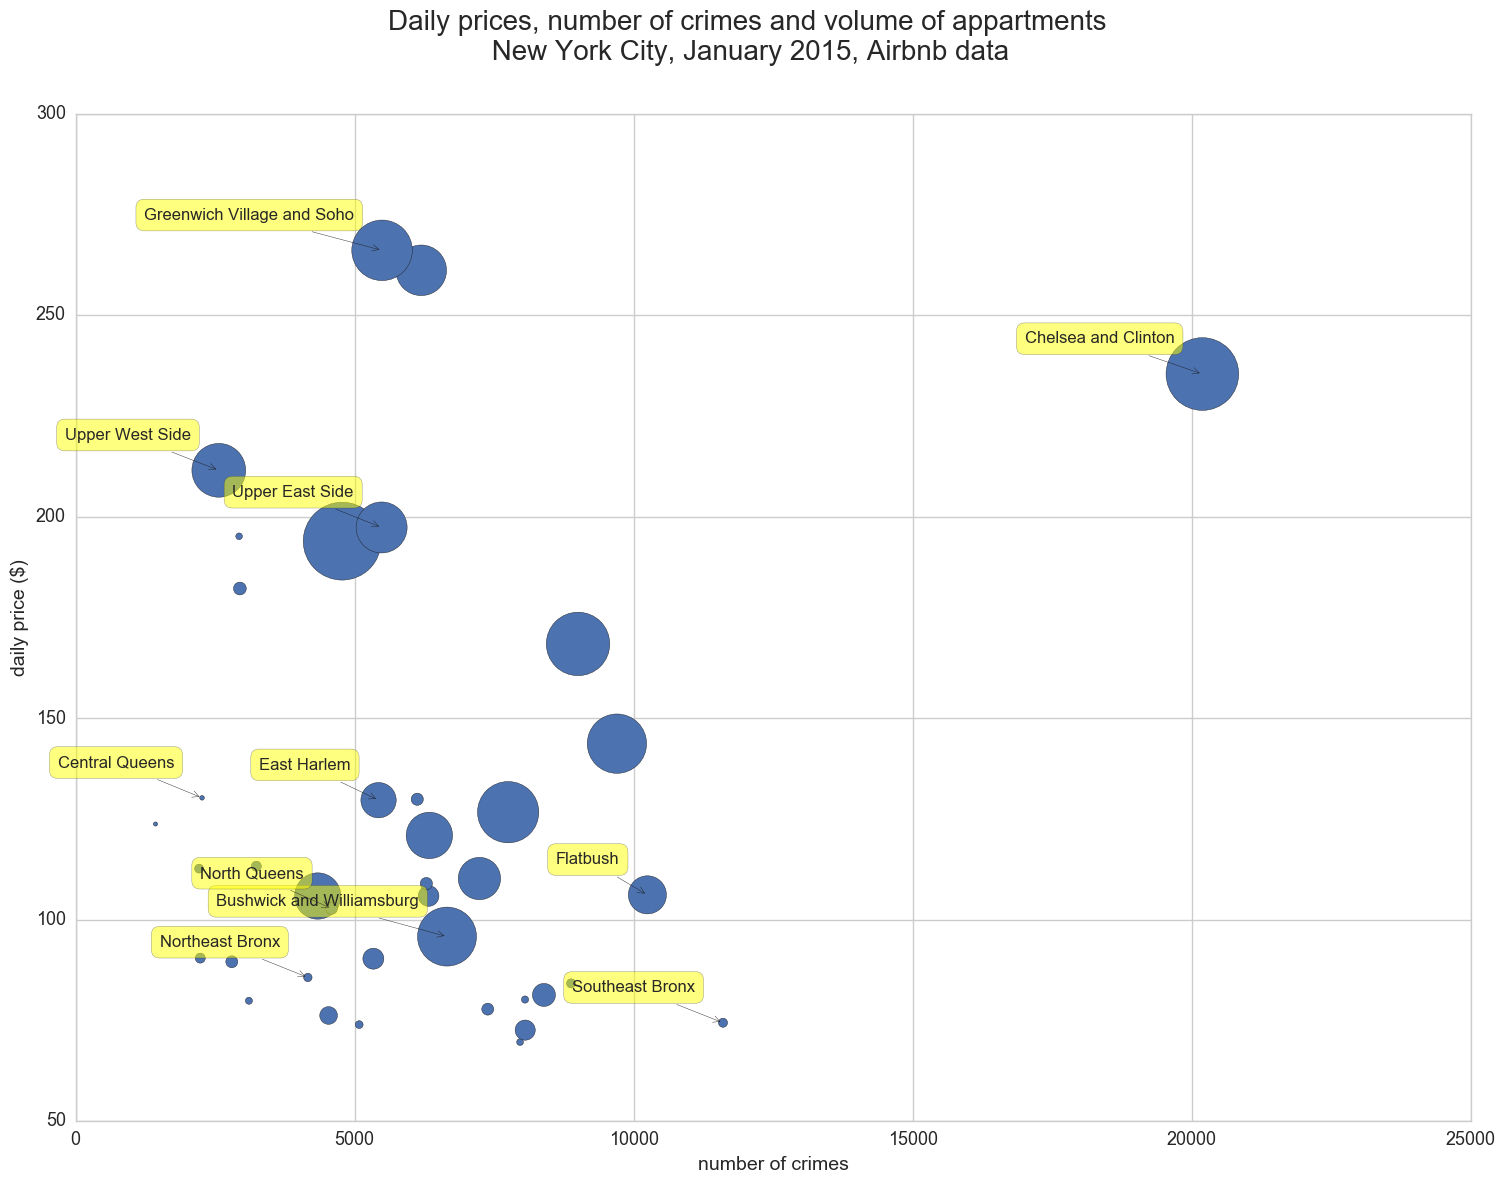

In [52]:
CrimePlot().plotscatter()

## Detailed view of crimes

In [54]:
data_crime_d=pd.read_csv('crime_data.csv')
data_crime_d=data_crime_d[['crime_type','crime_nb','precinct','zipcode']]
data_z_n=pd.read_csv('zip_neighborhood.csv')
data_z_n=data_z_n[['neighborhood','zipcode']]

In [55]:
nrow=len(data_crime_d.index)
n=len(data_z_n.index)
list_neig=[]
for i in range(nrow):
    for j in range(n):
        if str(data_crime_d['zipcode'][i])==str(data_z_n['zipcode'][j]):
            list_neig.append(str(data_z_n['neighborhood'][j]))     
        if len(list_neig)<i:
            list_neig.append('None')

In [56]:
data_crime_d['district']=list_neig

In [57]:
data_crime_grouped=data_crime_d.groupby(by=['crime_type','district'],as_index=False)['crime_nb'].sum()
data_housing_price=data_housing.groupby(by=['district'],as_index=False)['day_price'].mean()
data_housing_count = pd.DataFrame({'count' : data_housing.groupby(data_housing.district).size()}).reset_index()

In [58]:
merged=pd.merge(data_crime_grouped,data_housing_price,how='inner',left_on='district',right_on='district')
data=pd.merge(merged,data_housing_count,how='inner',left_on='district',right_on='district')

In [59]:
data_murder=data.ix[data.crime_type=='Murder ']
labels_murder=data_murder['district'].tolist()
data_murder=data_murder.drop('crime_type',1)
data_murder=data_murder.drop('district',1)
matrix_murder=data_murder.as_matrix()
data_rape=data.ix[data.crime_type=='Rape ']
labels_rape=data_rape['district'].tolist()
data_rape=data_rape.drop('crime_type',1)
data_rape=data_rape.drop('district',1)
matrix_rape=data_rape.as_matrix()
data_burglary=data.ix[data.crime_type=='Burglary ']
labels_burglary=data_burglary['district'].tolist()
data_burglary=data_burglary.drop('crime_type',1)
data_burglary=data_burglary.drop('district',1)
matrix_burglary=data_burglary.as_matrix()

In [60]:
class CrimePlot(object):
    
    def plotscatter(self):
        fig, axes = plt.subplots(figsize = (18, 13))
        plt.scatter(matrix[:,0],matrix[:,1],marker='o',s=matrix[:,2],cmap=plt.get_cmap('Spectral'))
        s=['Bushwick and Williamsburg','Central Queens', 'Chelsea and Clinton', 
           'East Harlem', 'Flatbush', 'Greenwich Village and Soho','North Queens',
           'Northeast Bronx','Southeast Bronx','Upper East Side','Upper West Side']
        l=[]
        for nei in s:
            l.append(labels.index(nei))
        for i in l:
            plt.annotate(
                    labels[i], 
                    xy = (matrix[:,0][i], matrix[:,1][i]), xytext = (-20, 20),
                    textcoords = 'offset points', ha = 'right', va = 'bottom',
                    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        axes.set_xlabel('number of crimes', fontsize = 14)
        axes.set_ylabel('daily price ($)', fontsize = 14)

        plt.yticks(fontsize = 13)
        plt.xticks(fontsize = 13)

        plt.suptitle('Daily prices, number of crimes and volume of appartments \n New York City, January 2015, Airbnb data \n', fontsize = 20)

In [61]:
class MurderPlot(object):
    
    def plotscatter(self):
        fig, axes = plt.subplots(figsize = (18, 13))
        plt.scatter(matrix_murder[:,0],matrix_murder[:,1],marker='o',s=matrix_murder[:,2],cmap=plt.get_cmap('Spectral'))
        s=['Bushwick and Williamsburg','Central Queens', 'Chelsea and Clinton', 
           'East Harlem', 'Flatbush', 'Greenwich Village and Soho','North Queens',
           'Northeast Bronx','Southeast Bronx','Upper East Side','Upper West Side']
        l=[]
        for nei in s:
            l.append(labels_murder.index(nei))
        for i in l:
            plt.annotate(
                    labels_murder[i], 
                    xy = (matrix_murder[:,0][i], matrix_murder[:,1][i]), xytext = (-20, 20),
                    textcoords = 'offset points', ha = 'right', va = 'bottom',
                    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        axes.set_xlabel('number of murders', fontsize = 14)
        axes.set_ylabel('daily price ($)', fontsize = 14)

        plt.yticks(fontsize = 13)
        plt.xticks(fontsize = 13)

        plt.suptitle('Daily prices, number of murders and volume of appartments \n New York City, January 2015, Airbnb data \n', fontsize = 20)

In [62]:
class RapePlot(object):
    
    def plotscatter(self):
        fig, axes = plt.subplots(figsize = (18, 13))
        plt.scatter(matrix_rape[:,0],matrix_rape[:,1],marker='o',s=matrix_rape[:,2],cmap=plt.get_cmap('Spectral'))
        s=['Bushwick and Williamsburg','Central Queens', 'Chelsea and Clinton', 
           'East Harlem', 'Flatbush', 'Greenwich Village and Soho','North Queens',
           'Northeast Bronx','Southeast Bronx','Upper East Side','Upper West Side']
        l=[]
        for nei in s:
            l.append(labels_rape.index(nei))
        for i in l:
            plt.annotate(
                    labels_rape[i], 
                    xy = (matrix_rape[:,0][i], matrix_rape[:,1][i]), xytext = (-20, 20),
                    textcoords = 'offset points', ha = 'right', va = 'bottom',
                    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        axes.set_xlabel('number of rapes', fontsize = 14)
        axes.set_ylabel('daily price ($)', fontsize = 14)

        plt.yticks(fontsize = 13)
        plt.xticks(fontsize = 13)

        plt.suptitle('Daily prices, number of rapes and volume of appartments \n New York City, January 2015, Airbnb data \n', fontsize = 20)

In [63]:
class BurglaryPlot(object):
    
    def plotscatter(self):
        fig, axes = plt.subplots(figsize = (18, 13))
        plt.scatter(matrix_burglary[:,0],matrix_burglary[:,1],marker='o',s=matrix_burglary[:,2],cmap=plt.get_cmap('Spectral'))
        s=['Bushwick and Williamsburg','Central Queens', 'Chelsea and Clinton', 
           'East Harlem', 'Flatbush', 'Greenwich Village and Soho','North Queens',
           'Northeast Bronx','Southeast Bronx','Upper East Side','Upper West Side']
        l=[]
        for nei in s:
            l.append(labels_burglary.index(nei))
        for i in l:
            plt.annotate(
                    labels_burglary[i], 
                    xy = (matrix_burglary[:,0][i], matrix_burglary[:,1][i]), xytext = (-20, 20),
                    textcoords = 'offset points', ha = 'right', va = 'bottom',
                    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        axes.set_xlabel('number of burglaries', fontsize = 14)
        axes.set_ylabel('daily price ($)', fontsize = 14)

        plt.yticks(fontsize = 13)
        plt.xticks(fontsize = 13)

        plt.suptitle('Daily prices, number of burglaries and volume of appartments \n New York City, January 2015, Airbnb data \n', fontsize = 20)


Same graph as before, this time for a particular type of crime.

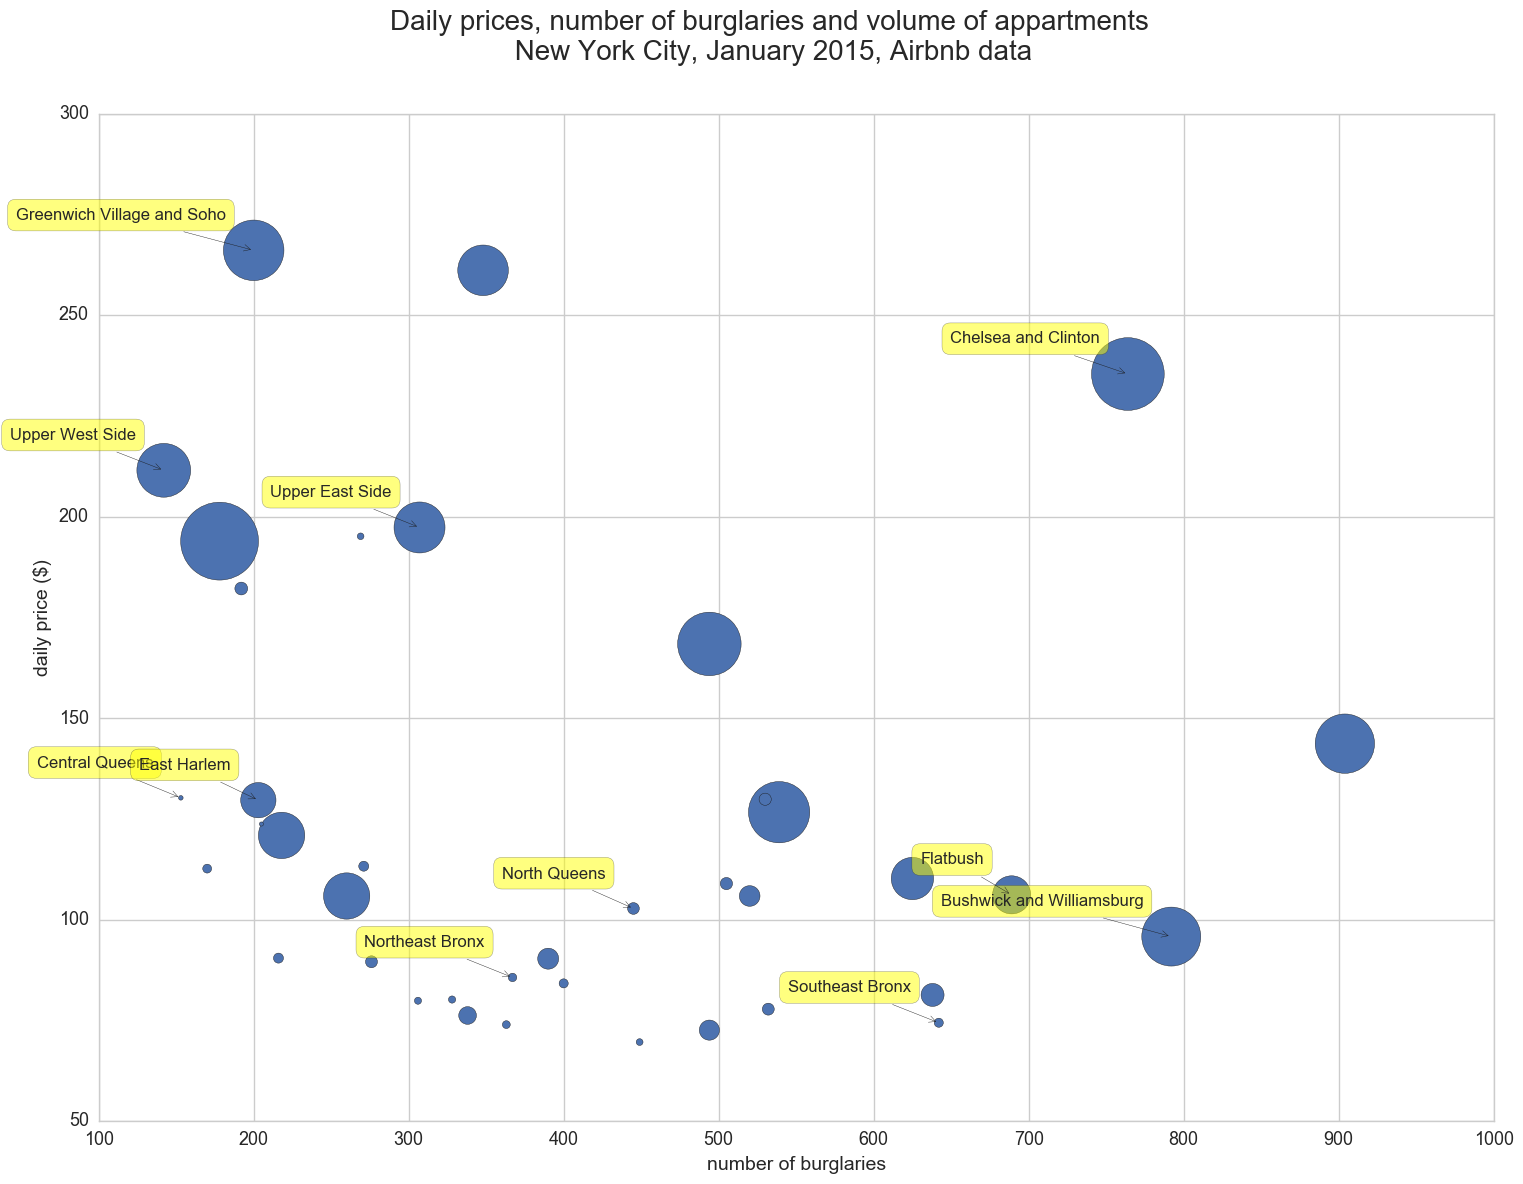

In [64]:
BurglaryPlot().plotscatter()
#MurderPlot().plotscatter()
#RapePlot().plotscatter()

# Search engine

In [65]:
import time

def Search():
    print("Welcome to NYC appartment and crime search engine.\n " +
              "Which information do you want to get? Imput number: \n" +
               "1 : Apartments \n" +
               "2 : Apartment Market vs Crime Levels \n")
    
    input1 = str(input())
    
    while (input1 not in ["1", "2"]) :
        print('Sorry, we could not understand what you are looking for. Select a number.')
        input1 = str(input())
    
    if input1 == "1" :
        
        print("\n Select an option to deep-dive: \n" +
                  "0 : Borough Level \n"+
                  "1 : District Level \n")
        
        input2 = str(input())
        while (input2 not in ["0", "1"]) :
            print('Sorry, we could not understand what you are looking for. Select a number.')
            input2 = str(input())
        
        if input2 == "0" :
            nyc_price.plotboxplot()
            cnt_neigh_NYC.plotcount()
            cnt_neigh_roomtype_NYC.plotcount()
            cnt_property_NYC.plotcount()
            
        elif input2 == "1" :
            print("\n Select one district: \n"+
                    "1 : Bronx \n"+
                    "2 : Brooklyn \n"+
                    "3 : Manhattan \n"+
                    "4 : Queens \n"+
                    "5 : Staten Island \n")
                    # JG: This should be automatic, based on the data
            
            input3 = str(input())
            while (input3 not in ["1", "2", "3", "4", "5"]) :
                print('Sorry, we could not understand what you are looking for. Select a number.')
                input3 = str(input())

            if input3 == "1" :
                bx_price_bronx.plotboxplot()
                bronx_price.plotboxplot()
                cnt_neigh_Bronx.plotcount()
                cnt_neigh_roomtype_Bronx.plotcount()
                cnt_property_Bronx.plotcount()
            elif input3 == "2" :
                bx_price_brookl.plotboxplot()
                brook_price.plotboxplot()
                cnt_neigh_Brook.plotcount()
                cnt_neigh_roomtype_Brook.plotcount()
                cnt_property_Brook.plotcount()               
            elif input3 == "3" :      
                bx_price_manh.plotboxplot()
                manh_price.plotboxplot()
                cnt_neigh_Manh.plotcount()
                cnt_neigh_roomtype_Manh.plotcount()
                cnt_property_Manh.plotcount()
            elif input3 == "4" :    
                bx_price_queens.plotboxplot()
                queens_price.plotboxplot()
                cnt_neigh_Queens.plotcount()
                cnt_neigh_roomtype_Queens.plotcount()
                cnt_property_Queens.plotcount()
            elif input3 == "5" :
                bx_price_staten.plotboxplot()
                staten_price.plotboxplot()
                cnt_neigh_Staten.plotcount()
                cnt_neigh_roomtype_Staten.plotcount()
                cnt_property_Staten.plotcount()
    elif input1 == "2":
        print("\n Select an option to deep-dive: \n" +
                  "0 : All crime \n"+
                  "1 : Burglary \n"+
                  "2 : Rape \n"+
                  "3 : Murder \n")
        
        input4 = str(input())
        while (input4 not in ["0", "1", "2", "3"]) :
            print('Sorry, we could not understand what you are looking for. Select a number.')
            input4 = str(input())
            
        if input4 == "0" :
            CrimePlot().plotscatter()                
        elif input4 == "1" :
            BurglaryPlot().plotscatter()    
        elif input4 == "2" :      
            RapePlot().plotscatter()                
        elif input4 == "3" :    
            MurderPlot().plotscatter()
            
    print("Thank you")

# Using the search engine

Follow the instructions bellow.

Welcome to NYC appartment and crime search engine.
 Which information do you want to get? Imput number: 
1 : Apartments 
2 : Apartment Market vs Crime Levels 

1

 Select an option to deep-dive: 
0 : Borough Level 
1 : District Level 

0
Thank you


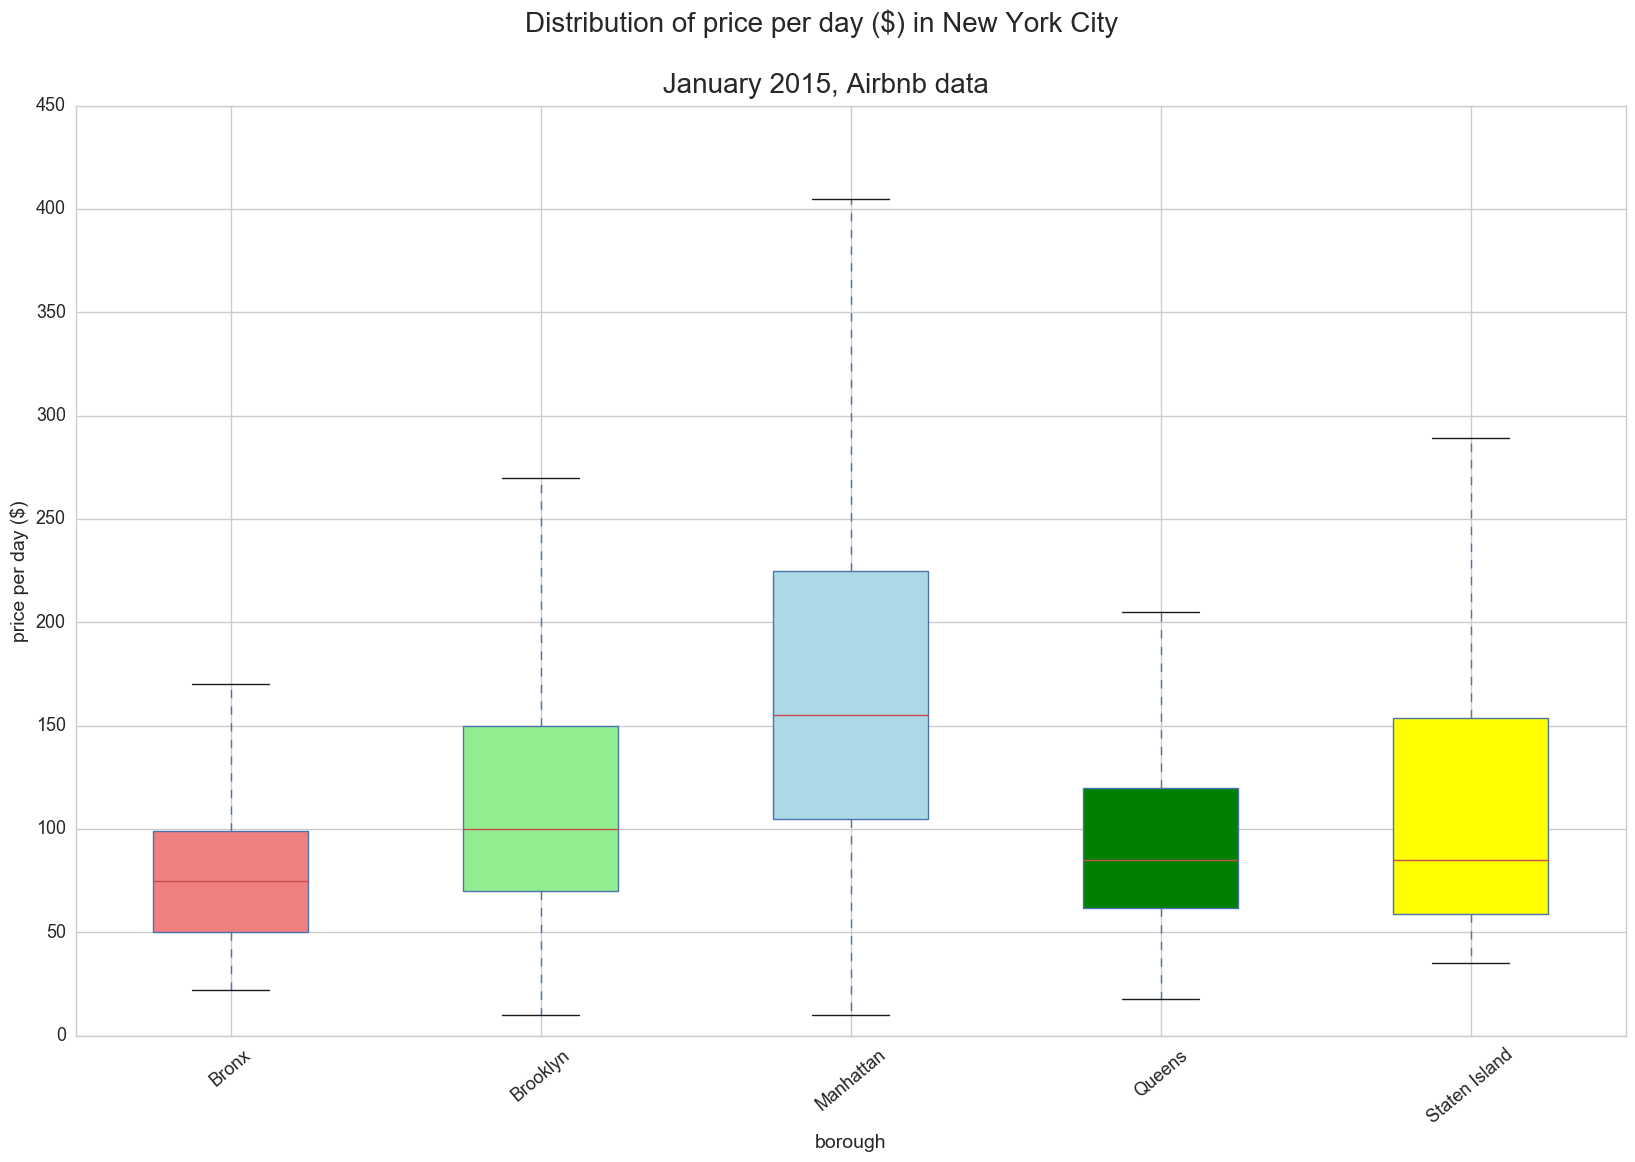

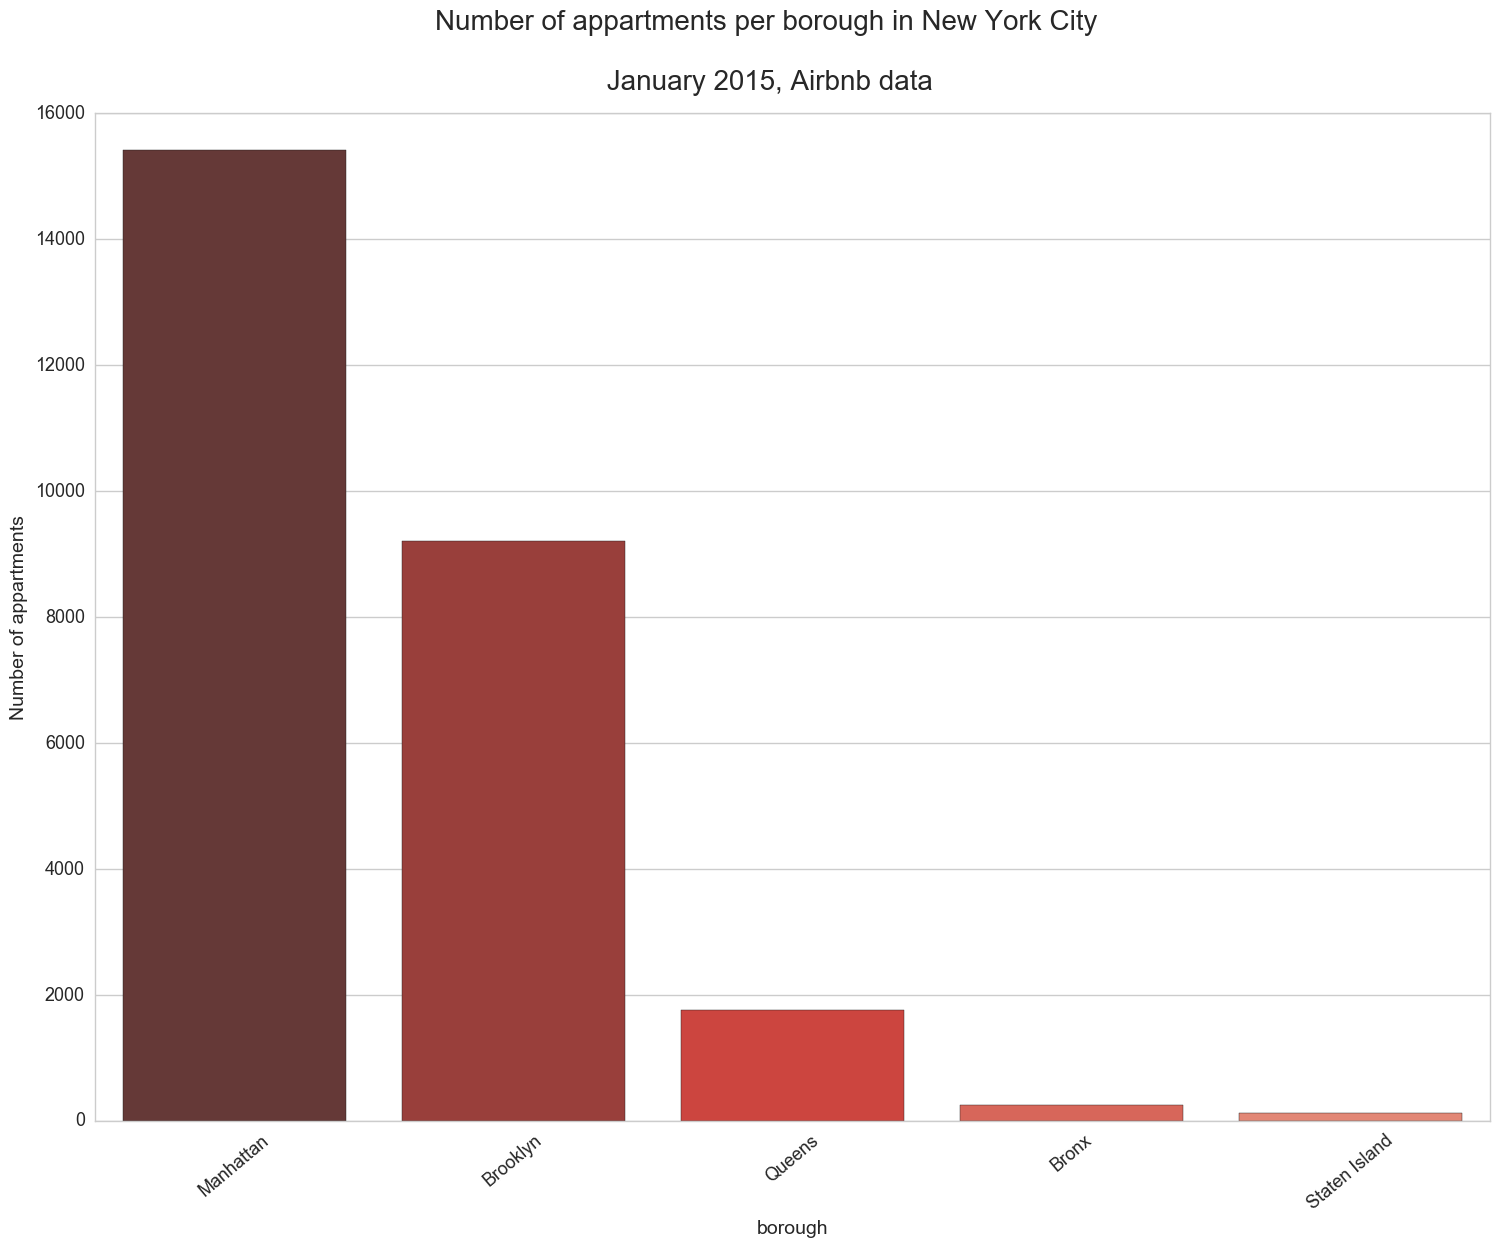

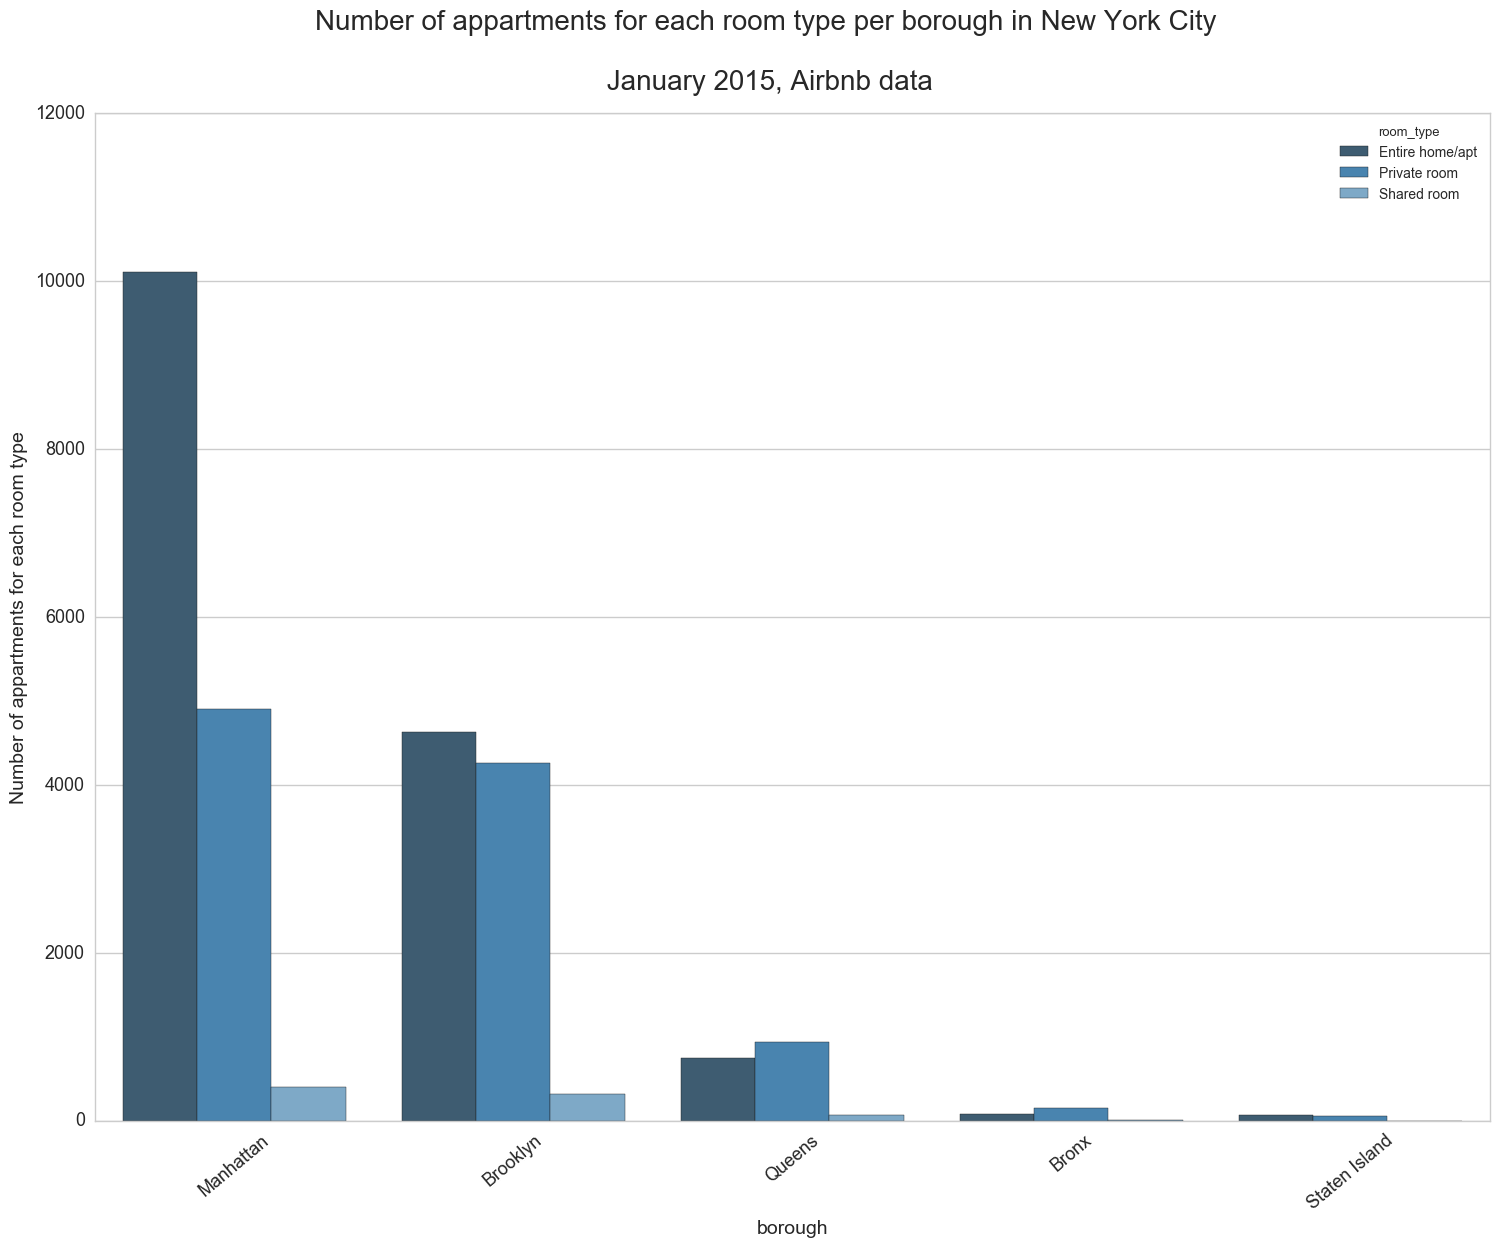

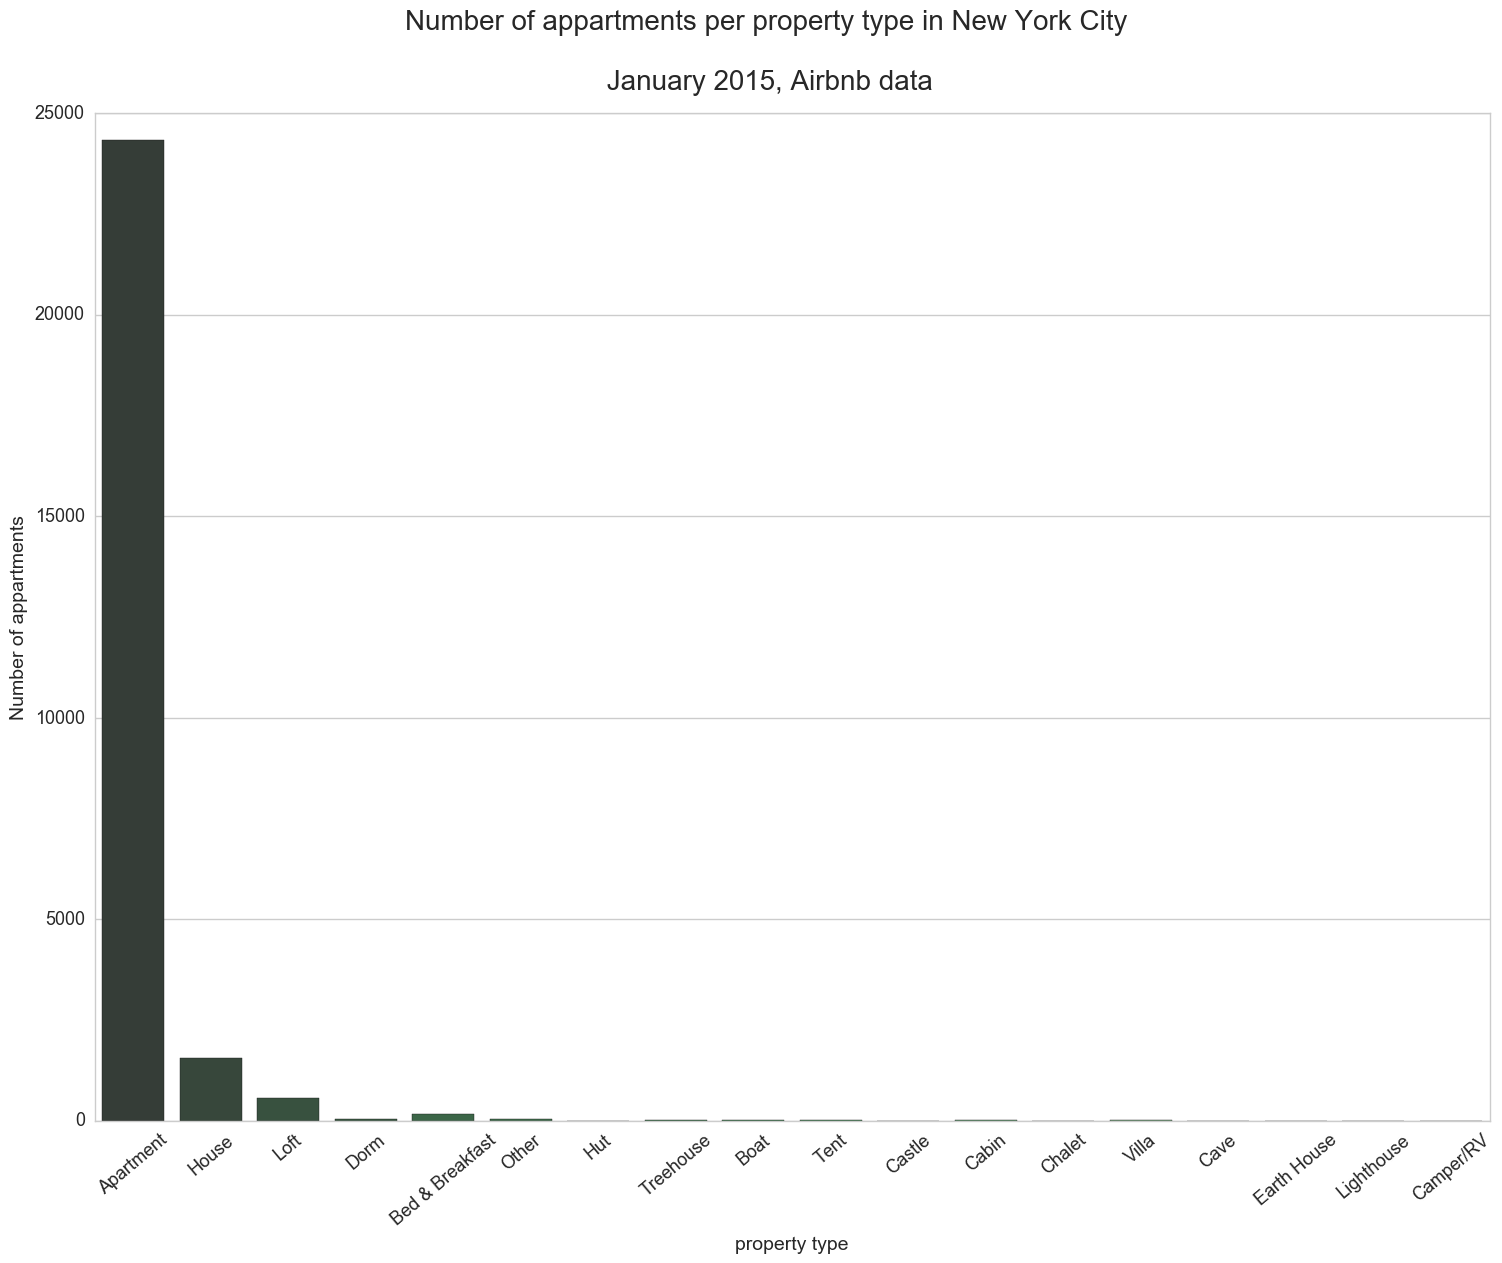

In [66]:
Search()